# Importing the Dependencies

In [56]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [5]:
df_train = pd.read_csv('D:/DataSets/Fashion_MNIST/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test = pd.read_csv('D:/DataSets/Fashion_MNIST/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

# Assign the input shape

In [8]:
img_rows, img_cols = 28, 28

In [10]:
input_shape = (img_rows, img_cols, 1)
input_shape

(28, 28, 1)

# Split the dataset

In [12]:
X = np.array(df_train.iloc[:, 1:])
y = to_categorical(np.array(df_train.iloc[:, 0]))

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
X_test = np.array(df_test.iloc[:, 1:])
y_test = to_categorical(np.array(df_test.iloc[:, 0]))

In [22]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

In [23]:
X_train, X_val, X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 35,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 1, 3, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [24]:
y_train, y_val, y_test

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32))

# Data Preparation

In [27]:
X_train.shape

(48000, 784)

In [29]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train.shape

(48000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 784)

In [31]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test.shape

(10000, 28, 28, 1)

In [32]:
X_val.shape

(12000, 784)

In [33]:
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val.shape

(12000, 28, 28, 1)

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [39]:
X_train /= 255
X_test /= 255
X_val /= 255

# Model Building

In [45]:
batch_size = 256
num_classes = 10
epochs = 50

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [48]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [49]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/50
188/188 [==============================] - 40s 191ms/step - loss: 1.2591 - accuracy: 0.5324 - val_loss: 85.9433 - val_accuracy: 0.5599
Epoch 2/50
188/188 [==============================] - 40s 211ms/step - loss: 0.8127 - accuracy: 0.6915 - val_loss: 59.3390 - val_accuracy: 0.6441
Epoch 3/50
188/188 [==============================] - 41s 218ms/step - loss: 0.7228 - accuracy: 0.7240 - val_loss: 43.4745 - val_accuracy: 0.7105
Epoch 4/50
188/188 [==============================] - 43s 227ms/step - loss: 0.6629 - accuracy: 0.7461 - val_loss: 49.3999 - val_accuracy: 0.6733
Epoch 5/50
188/188 [==============================] - 48s 255ms/step - loss: 0.6194 - accuracy: 0.7628 - val_loss: 105.6050 - val_accuracy: 0.5441
Epoch 6/50
188/188 [==============================] - 52s 279ms/step - loss: 0.5894 - accuracy: 0.7750 - val_loss: 127.6893 - val_accuracy: 0.5247
Epoch 7/50
188/188 [==============================] - 47s 250ms/step - loss: 0.5689 - accuracy: 0.7821 - val_loss: 101.730

In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[47.031681060791016, 0.7993000149726868]

In [52]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 47.031681060791016
Test accuracy: 0.7993000149726868


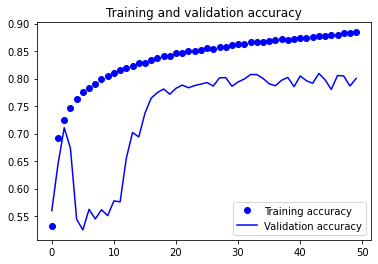

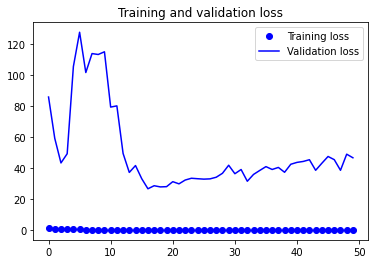

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluation

In [60]:
predicted_classes = model.predict(X_test)
predicted_classes 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)